In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
dataset = pd.read_csv("01-Support Vector Machine.csv")
dataset.head(3)

,User ID,Gender,Age,Estimated Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Female,35,20000,0
2,15804002,Female,26,43000,0


In [3]:
gender = pd.get_dummies(dataset["Gender"], drop_first=True)
gender.head(2)

,Male
0,True
1,False


In [4]:
dataset = pd.concat([dataset, gender], axis = 1)
dataset.head(3)

,User ID,Gender,Age,Estimated Salary,Purchased,Male
0,15624510,Male,19,19000,0,True
1,15810944,Female,35,20000,0,False
2,15804002,Female,26,43000,0,False


In [5]:
deleteddata = dataset.drop(["Gender"], axis=1, inplace=True)

In [6]:
dataset.head(3)

,User ID,Age,Estimated Salary,Purchased,Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,False
2,15804002,26,43000,0,False


In [7]:
dataset['Male'] = dataset['Male'].astype(int)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   User ID           115 non-null    int64
 1   Age               115 non-null    int64
 2   Estimated Salary  115 non-null    int64
 3   Purchased         115 non-null    int64
 4   Male              115 non-null    int64
dtypes: int64(5)
memory usage: 4.6 KB


In [9]:
X = dataset[['Male', 'Age', 'Estimated Salary']]
y = dataset['Purchased']

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.svm import SVC
# Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# Predict the target values for the test set
y_pred = svm.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.4782608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.62        14
           1       0.20      0.11      0.14         9

    accuracy                           0.48        23
   macro avg       0.38      0.41      0.38        23
weighted avg       0.42      0.48      0.44        23



In [15]:
# Reduce the dimensionality of the features to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

C:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


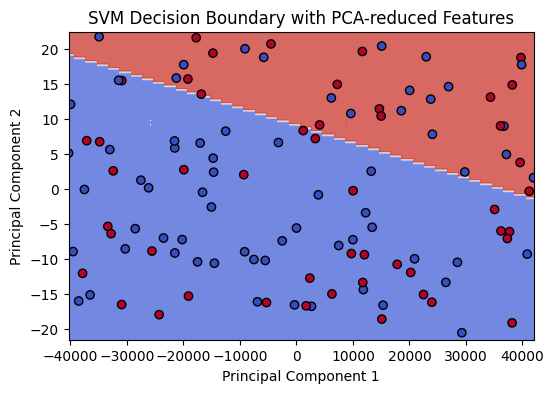

In [21]:
# Plotting the decision boundary
h = .5  # Increase step size to reduce memory usage
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA-reduced Features')
plt.show()